<a href="https://colab.research.google.com/github/Samuel-Tito-Infantas/Titanic-project/blob/main/Titanic_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Kaggle Solved by SRT

## Conexão, Preparação e instalação de bib

In [3]:
# Importação 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os

# Tratamento de informação

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

# Modelos de ML

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

# Avaliação dos modelos

from sklearn.metrics import accuracy_score

# Conexão API Kaggle
# how to get How to use datasets from Kaggle on Google Colab using Kaggle API ? : https://www.youtube.com/watch?v=gwDOUuBH7ws

os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 8.27MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 54.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.8MB/s]


## Importação de dados

In [4]:
#Importação dos dframe
df_train_0 = pd.read_csv('train.csv')
df_test_0 = pd.read_csv('test.csv')
df_submission_0 = pd.read_csv('gender_submission.csv')

In [5]:
# Revisão de conjunto treino
df_train_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Revisão de conjunto teste
df_test_0.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Revisão de conjunto teste
df_submission_0.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Tratamento de dados de dados

### Base treino

In [8]:
#Informações sobre a base
print('1) O shape do dataframe é : '+ str(df_train_0.shape))
print('-'*80)
print('2)Descripção dos dados : ')
print(' ')
print(df_train_0.dtypes)

1) O shape do dataframe é : (891, 12)
--------------------------------------------------------------------------------
2)Descripção dos dados : 
 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
# Verificando % Valores Null
df_train_0.isnull().sum()/len(df_train_0.index)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
# Verificando Mediana e Moda dos dados para preenchimento

df_train_0['Embarked'].value_counts().sort_values(ascending=False)
df_train_0['Cabin'].value_counts().sort_values(ascending=False)

#no caso de 'Cabin', temos 6 valores que podem ser a moda - será usado para preencher os NULL
rand_cabin = ['C23', 'C25', 'C27', 'G6', 'B96', 'B98']

In [11]:
# Preenchendo os dados

df_train_0['Age'].fillna(df_train_0['Age'].median(),inplace=True)
df_train_0['Cabin'].fillna(random.choice(rand_cabin),inplace = True)
df_train_0['Embarked'].fillna('S',inplace = True)

# Verificando de novo os campos NULL


df_train_0.isnull().sum()/len(df_train_0.index)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

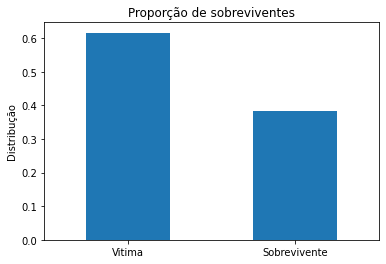

In [12]:
# Revisão de Proporção

df_train_0['Survived'].value_counts(normalize = True).plot.bar(rot = 0, title = 'Proporção de sobreviventes')
plt.ylabel('Distribução')
plt.xticks(np.arange(2), ['Vitima', 'Sobrevivente'])
plt.show()

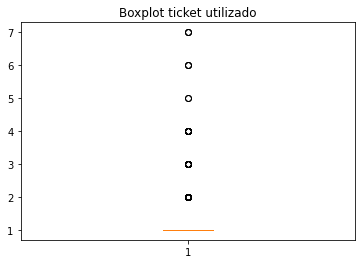

In [13]:
# Verficando se existe 1 ticket por pessoa

fig, ax = plt.subplots()

# Boxplot

ax.boxplot(df_train_0['Ticket'].value_counts())
ax.set_title("Boxplot ticket utilizado")
plt.show()


### Base teste

In [14]:
#Informações sobre a base
print('1) O shape do dataframe é : '+ str(df_test_0.shape))
print('-'*80)
print('2)Descripção dos dados : ')
print(' ')
print(df_test_0.dtypes)

1) O shape do dataframe é : (418, 11)
--------------------------------------------------------------------------------
2)Descripção dos dados : 
 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [15]:
# Verificando % Valores Null
df_test_0.isnull().sum()/len(df_train_0.index)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [16]:
# Verificando Mediana e Moda dos dados para preenchimento
df_test_0['Cabin'].value_counts().sort_values(ascending=False)

# Preenchendo os dados

df_test_0['Age'].fillna(df_test_0['Age'].median(),inplace=True)
df_test_0['Fare'].fillna(df_test_0['Fare'].median(),inplace=True)
df_test_0['Cabin'].fillna('C27',inplace = True)

# Verificando Null
df_test_0.isnull().sum()/len(df_train_0.index)*100

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [17]:
df_test_0

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C27,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C27,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C27,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C27,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C27,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,C27,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C27,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,C27,S


## Análise dos dados

### Análise de distribução: Pclass

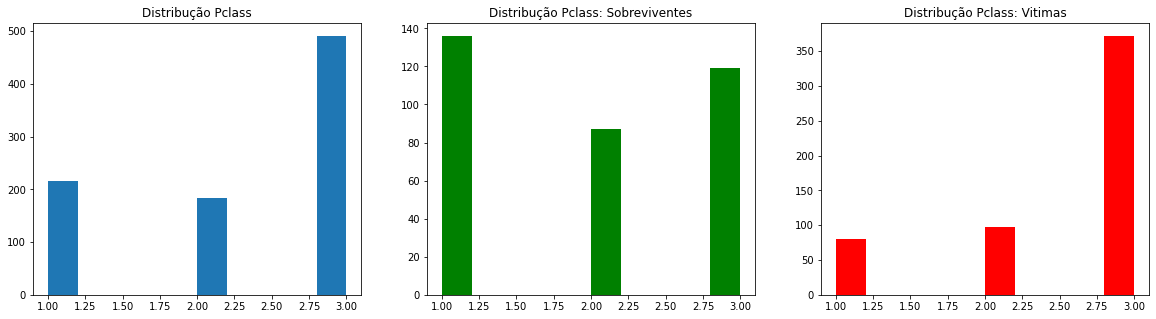

In [18]:
# Criar área do gráfico (distribução)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [20, 5], sharex = True)

# Gráfico 1

ax1.hist(df_train_0['Pclass'])
ax1.set_title('Distribução Pclass')

 

# Gráfico 2

ax2.hist(df_train_0.loc[df_train_0['Survived'] == 1, 'Pclass'], color = "green")
ax2.set_title('Distribução Pclass: Sobreviventes')

# Gráfico 3

ax3.hist(df_train_0.loc[df_train_0['Survived'] == 0, 'Pclass'], color = "red")

ax3.set_title('Distribução Pclass: Vitimas')

plt.show()

### Análise de distribução: Age

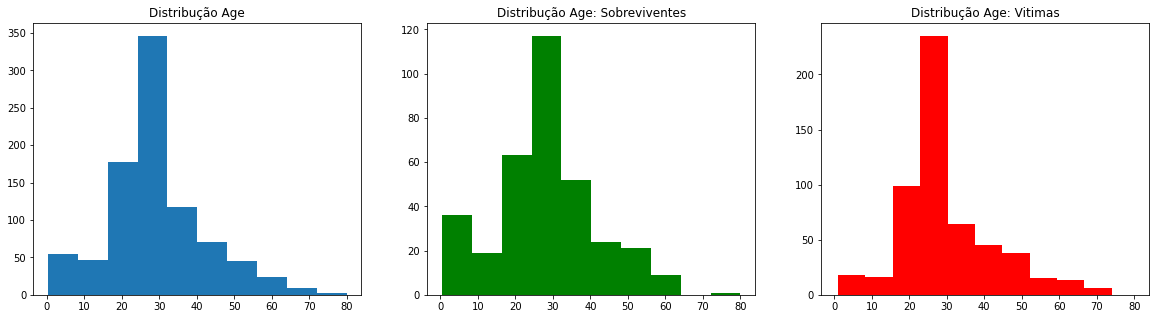

In [19]:
# Criar área do gráfico (distribução)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [20, 5], sharex = True)

# Gráfico 1

ax1.hist(df_train_0['Age'])
ax1.set_title('Distribução Age')

 
# Gráfico 2

ax2.hist(df_train_0.loc[df_train_0['Survived'] == 1, 'Age'], color = "green")
ax2.set_title('Distribução Age: Sobreviventes')

# Gráfico 3

ax3.hist(df_train_0.loc[df_train_0['Survived'] == 0, 'Age'], color = "red")

ax3.set_title('Distribução Age: Vitimas')

plt.show()

### Análise de distribução: Sibsp

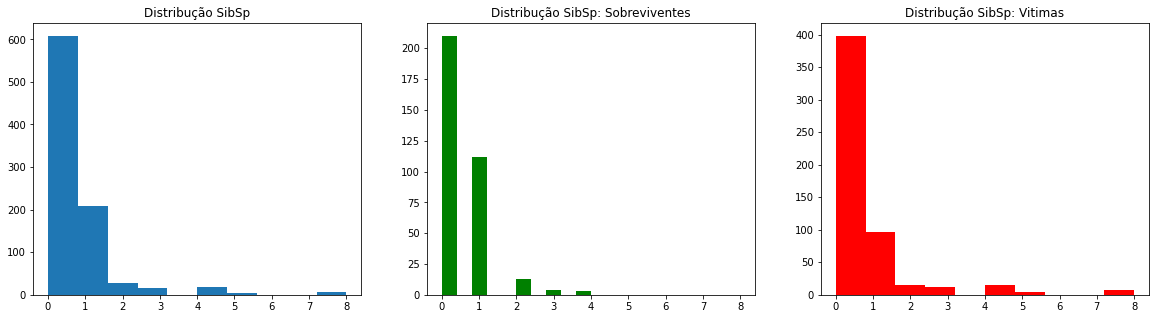

In [20]:
# Criar área do gráfico (distribução)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [20, 5], sharex = True)

# Gráfico 1

ax1.hist(df_train_0['SibSp'])
ax1.set_title('Distribução SibSp')

 
# Gráfico 2

ax2.hist(df_train_0.loc[df_train_0['Survived'] == 1, 'SibSp'], color = "green")
ax2.set_title('Distribução SibSp: Sobreviventes')

# Gráfico 3

ax3.hist(df_train_0.loc[df_train_0['Survived'] == 0, 'SibSp'], color = "red")

ax3.set_title('Distribução SibSp: Vitimas')

plt.show()

### Análise de distribução: Parch

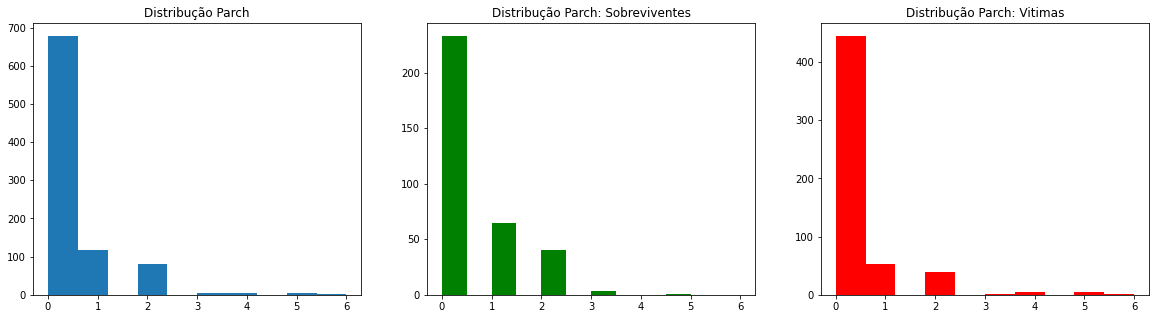

In [21]:
# Criar área do gráfico (distribução)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [20, 5], sharex = True)

# Gráfico 1

ax1.hist(df_train_0['Parch'])
ax1.set_title('Distribução Parch')

 
# Gráfico 2

ax2.hist(df_train_0.loc[df_train_0['Survived'] == 1, 'Parch'], color = "green")
ax2.set_title('Distribução Parch: Sobreviventes')

# Gráfico 3

ax3.hist(df_train_0.loc[df_train_0['Survived'] == 0, 'Parch'], color = "red")

ax3.set_title('Distribução Parch: Vitimas')

plt.show()

### Análise de distribução: Sex

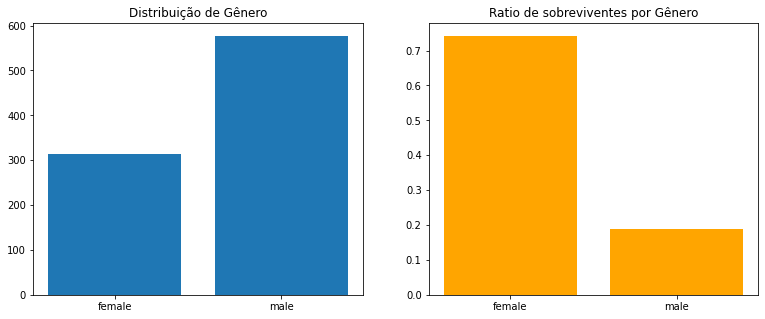

In [22]:
# Agrupar dados na estrutura necessária

tabela_sex = df_train_0.groupby('Sex').agg(total = pd.NamedAgg(column = 'Survived', aggfunc = 'count'),
                                                    sobrevivente = pd.NamedAgg(column = 'Survived', aggfunc = 'sum')).reset_index()

# Calculo de ratio sobrevivientes:
tabela_sex['sobrevivencia_ratio'] = tabela_sex['sobrevivente']/tabela_sex['total']


# Criar área do gráfico

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [13, 5])

# Gráfico 1

ax1.bar(x = tabela_sex['Sex'], height = tabela_sex['total'])
ax1.set_title("Distribuição de Gênero")

# Gráfico 2

ax2.bar(x = tabela_sex['Sex'], height = tabela_sex['sobrevivencia_ratio'],color='orange')
ax2.set_title("Ratio de sobreviventes por Gênero")

plt.show()

### Análise de distribução: Cabin

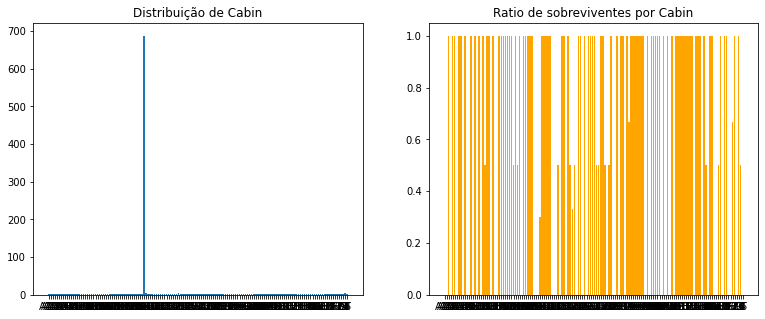

In [23]:
# Agrupar dados na estrutura necessária

tabela = df_train_0.groupby('Cabin').agg(total = pd.NamedAgg(column = 'Survived', aggfunc = 'count'),
                                                    sobrevivente = pd.NamedAgg(column = 'Survived', aggfunc = 'sum')).reset_index()

# Calculo de ratio sobrevivientes:
tabela['sobrevivencia_ratio'] = tabela['sobrevivente']/tabela['total']


# Criar área do gráfico

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [13, 5])

# Gráfico 1

ax1.bar(x = tabela['Cabin'], height = tabela['total'])
ax1.set_title("Distribuição de Cabin")

# Gráfico 2

ax2.bar(x = tabela['Cabin'], height = tabela['sobrevivencia_ratio'],color='orange')
ax2.set_title("Ratio de sobreviventes por Cabin")

plt.show()

### Análise de distribução: Embarked

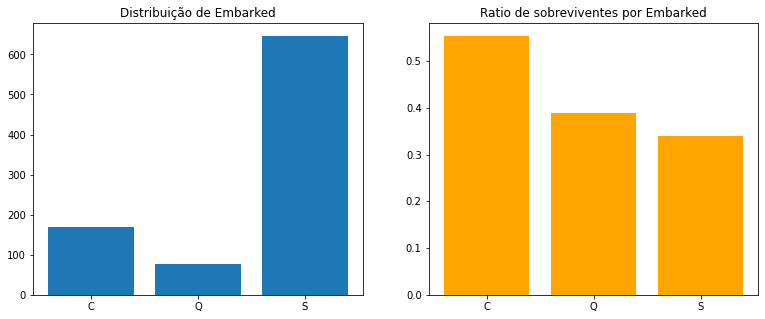

In [24]:
# Agrupar dados na estrutura necessária

tabela = df_train_0.groupby('Embarked').agg(total = pd.NamedAgg(column = 'Survived', aggfunc = 'count'),
                                                    sobrevivente = pd.NamedAgg(column = 'Survived', aggfunc = 'sum')).reset_index()

# Calculo de ratio sobrevivientes:
tabela['sobrevivencia_ratio'] = tabela['sobrevivente']/tabela['total']


# Criar área do gráfico

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [13, 5])

# Gráfico 1

ax1.bar(x = tabela['Embarked'], height = tabela['total'])
ax1.set_title("Distribuição de Embarked")

# Gráfico 2

ax2.bar(x = tabela['Embarked'], height = tabela['sobrevivencia_ratio'],color='orange')
ax2.set_title("Ratio de sobreviventes por Embarked")

plt.show()

### Análise correlação de variáveis

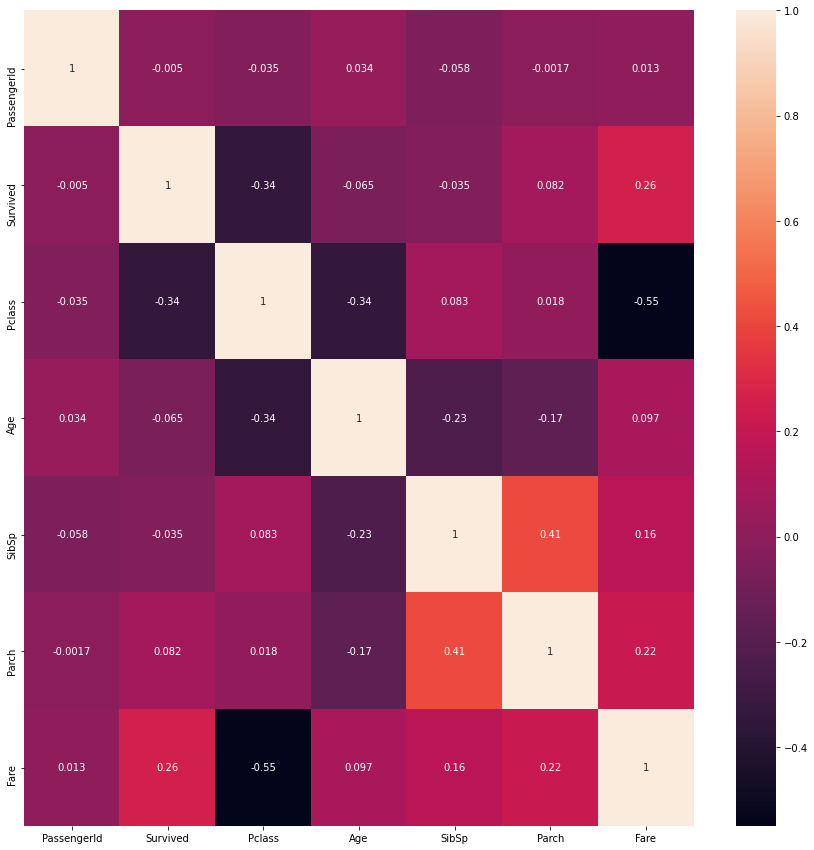

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax= sns.heatmap(df_train_0.corr(), annot=True)

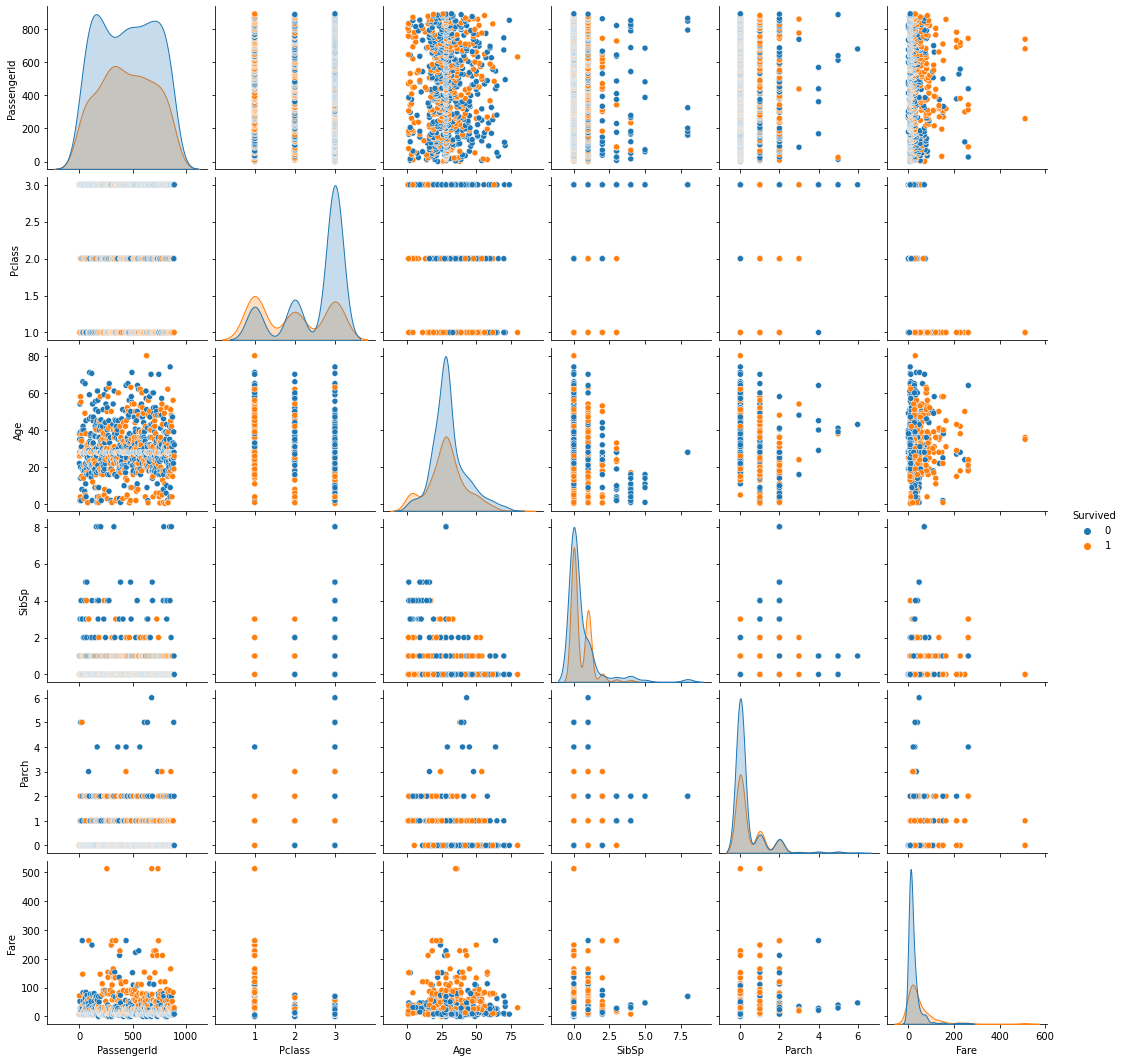

In [26]:
sns.pairplot(df_train_0, hue='Survived')

## Preprocesamento dos dados

In [27]:
#removendo dados que não servem: 1)PassengerId, 2)Name, 3)Ticket, 4)Cabin

df_train_0.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)
# Criar variáveis dummy de features categóricas

df_train_0 = pd.get_dummies(df_train_0, columns = ['Sex','Embarked'], drop_first = False)

  # Aplicando mesmo tratamento para a base de teste: 

df_test_0.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)
# Criar variáveis dummy de features categóricas

df_test_0 = pd.get_dummies(df_test_0, columns = ['Sex','Embarked'], drop_first = False)

In [28]:
df_test_0.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


### Diversificação: Não tratamento, Normalização e Padronização 

In [29]:
# Normalização:
  # Criar dataset de treino usando MinMaxScaler - normalização dos dados a partir dos valores extremos (escala de 0 a 1)
min_max = MinMaxScaler().fit(df_train_0.iloc[:,1:])

  # Novo dataset
X_train_normal = df_train_0.copy()
 
  # Aplicar as alterações
X_train_normal.iloc[:,1:] = min_max.transform(df_train_0.iloc[:,1:])

X_train_normal.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,1,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,1,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,1,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


In [30]:
# Standartization:
  # Criar dataset de treino usando MinMaxScaler - normalização dos dados a partir dos valores extremos (escala de 0 a 1)
standard = StandardScaler().fit(df_train_0.iloc[:,1:])

  # Novo dataset
X_train_standard = df_train_0.copy()
 
  # Aplicar as alterações
X_train_standard.iloc[:,1:] = standard.transform(df_train_0.iloc[:,1:])

X_train_standard.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [31]:
# Aplicando tratamento para a base de teste: 

X_test = df_test_0.copy()

# Normalização:
  # Novo dataset
X_test_normal = df_test_0.copy()
 
  # Aplicar min_xax da base de treino
X_test_normal.iloc[:,:] = min_max.transform(df_test_0.iloc[:,:])


# Standartization:

  # Novo dataset
X_test_standard = df_test_0.copy()
 
  # Aplicar as alterações
X_test_standard.iloc[:,:] = standard.transform(df_test_0.iloc[:,:])

### Separação de datasets

In [32]:
# Separando os y e X's

y = df_train_0.iloc[:,0].copy()
X = df_train_0.iloc[:,1:].copy()
X_norm = X_train_normal.iloc[:,1:].copy()
X_stand = X_train_standard.iloc[:,1:].copy()

In [33]:
# Split de teste e validação

  # Base sem tratamento
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

  # Base com Normalização
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_norm, y, test_size=0.25, random_state=22)

  # Base com Standartization
X_train_stand, X_val_stand, y_train_stand, y_val_stand = train_test_split(X_stand, y, test_size=0.25, random_state=12)


## Aplicação de modelos

### Regressão Logistica

In [34]:
# Regressão Logistica

reg_log = LogisticRegression()
reg_log_norm = LogisticRegression()
reg_log_stand = LogisticRegression()

# Treinamento
reg_log.fit(X_train, y_train)
reg_log_norm.fit(X_train_norm, y_train_norm)
reg_log_stand.fit(X_train_stand, y_train_stand)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Score treinamento:

print('Score / acuracia de treinamento:')
print(''*80)
print(f'Score - Base sem tratamento: {reg_log.score(X_train, y_train)}')
print(f'Score - Base normalizada: {reg_log_norm.score(X_train_norm, y_train_norm)}')
print(f'Score - Base standarization: {reg_log_stand.score(X_train_stand, y_train_stand)}')
print('*'*80)

# Score validação:

print('Score / acuracia de validacao:')
print(''*80)
print(f'Score - Base sem tratamento: {reg_log.score(X_val, y_val)}')
print(f'Score - Base normalizada: {reg_log_norm.score(X_val_norm, y_val_norm)}')
print(f'Score - Base standarization: {reg_log_stand.score(X_val_stand, y_val_stand)}')
print('*'*80)

Score / acuracia de treinamento:

Score - Base sem tratamento: 0.8023952095808383
Score - Base normalizada: 0.8038922155688623
Score - Base standarization: 0.7949101796407185
********************************************************************************
Score / acuracia de validacao:

Score - Base sem tratamento: 0.8071748878923767
Score - Base normalizada: 0.7713004484304933
Score - Base standarization: 0.8251121076233184
********************************************************************************


### Random Forest Classifier

In [36]:
 # Random Forest Classifier

rand_for = RandomForestClassifier()
rand_for_norm = RandomForestClassifier()
rand_for_stand = RandomForestClassifier()

# Treinamento
rand_for.fit(X_train, y_train)
rand_for_norm.fit(X_train_norm, y_train_norm)
rand_for_stand.fit(X_train_stand, y_train_stand)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
# Score treinamento:

print('Score / acuracia de treinamento:')
print(''*80)
print(f'Score - Base sem tratamento: {rand_for.score(X_train, y_train)}')
print(f'Score - Base normalizada: {rand_for_norm.score(X_train_norm, y_train_norm)}')
print(f'Score - Base standarization: {rand_for_stand.score(X_train_stand, y_train_stand)}')
print('*'*80)

# Score validação:

print('Score / acuracia de validacao:')
print(''*80)
print(f'Score - Base sem tratamento: {rand_for.score(X_val, y_val)}')
print(f'Score - Base normalizada: {rand_for_norm.score(X_val_norm, y_val_norm)}')
print(f'Score - Base standarization: {rand_for_stand.score(X_val_stand, y_val_stand)}')
print('*'*80)

Score / acuracia de treinamento:

Score - Base sem tratamento: 0.9805389221556886
Score - Base normalizada: 0.9850299401197605
Score - Base standarization: 0.9820359281437125
********************************************************************************
Score / acuracia de validacao:

Score - Base sem tratamento: 0.7937219730941704
Score - Base normalizada: 0.7802690582959642
Score - Base standarization: 0.7802690582959642
********************************************************************************


### Naive Bayes

In [38]:

# Naive Bayes

nai_bayes = GaussianNB()
nai_bayes_norm = GaussianNB()
nai_bayes_stand = GaussianNB()

# Treinamento
nai_bayes.fit(X_train, y_train)
nai_bayes_norm.fit(X_train_norm, y_train_norm)
nai_bayes_stand.fit(X_train_stand, y_train_stand)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
# Score treinamento:

print('Score / acuracia de treinamento:')
print(''*80)
print(f'Score - Base sem tratamento: {nai_bayes.score(X_train, y_train)}')
print(f'Score - Base normalizada: {nai_bayes_norm.score(X_train_norm, y_train_norm)}')
print(f'Score - Base standarization: {nai_bayes_stand.score(X_train_stand, y_train_stand)}')
print('*'*80)

# Score validação:

print('Score / acuracia de validacao:')
print(''*80)
print(f'Score - Base sem tratamento: {nai_bayes.score(X_val, y_val)}')
print(f'Score - Base normalizada: {nai_bayes_norm.score(X_val_norm, y_val_norm)}')
print(f'Score - Base standarization: {nai_bayes_stand.score(X_val_stand, y_val_stand)}')
print('*'*80)

Score / acuracia de treinamento:

Score - Base sem tratamento: 0.7964071856287425
Score - Base normalizada: 0.7964071856287425
Score - Base standarization: 0.7949101796407185
********************************************************************************
Score / acuracia de validacao:

Score - Base sem tratamento: 0.7802690582959642
Score - Base normalizada: 0.7802690582959642
Score - Base standarization: 0.8026905829596412
********************************************************************************


### Stochastic Gradient Descent 

In [40]:
# SGDClassifier

sgd = SGDClassifier()
sgd_norm = SGDClassifier()
sgd_stand = SGDClassifier()

# Treinamento
sgd.fit(X_train, y_train)
sgd_norm.fit(X_train_norm, y_train_norm)
sgd_stand.fit(X_train_stand, y_train_stand)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
# Score treinamento:

print('Score / acuracia de treinamento:')
print(''*80)
print(f'Score - Base sem tratamento: {sgd.score(X_train, y_train)}')
print(f'Score - Base normalizada: {sgd_norm.score(X_train_norm, y_train_norm)}')
print(f'Score - Base standarization: {sgd_stand.score(X_train_stand, y_train_stand)}')
print('*'*80)

# Score validação:

print('Score / acuracia de validacao:')
print(''*80)
print(f'Score - Base sem tratamento: {sgd.score(X_val, y_val)}')
print(f'Score - Base normalizada: {sgd_norm.score(X_val_norm, y_val_norm)}')
print(f'Score - Base standarization: {sgd_stand.score(X_val_stand, y_val_stand)}')
print('*'*80)

Score / acuracia de treinamento:

Score - Base sem tratamento: 0.687125748502994
Score - Base normalizada: 0.812874251497006
Score - Base standarization: 0.7739520958083832
********************************************************************************
Score / acuracia de validacao:

Score - Base sem tratamento: 0.6681614349775785
Score - Base normalizada: 0.7623318385650224
Score - Base standarization: 0.7668161434977578
********************************************************************************


### XGBOOST

In [42]:
# XGBOOST

xgb = XGBClassifier()
xgb_norm = XGBClassifier()
xgb_stand = XGBClassifier()

# Treinamento
xgb.fit(X_train, y_train)
xgb_norm.fit(X_train_norm, y_train_norm)
xgb_stand.fit(X_train_stand, y_train_stand)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
# Score treinamento:

print('Score / acuracia de treinamento:')
print(''*80)
print(f'Score - Base sem tratamento: {xgb.score(X_train, y_train)}')
print(f'Score - Base normalizada: {xgb_norm.score(X_train_norm, y_train_norm)}')
print(f'Score - Base standarization: {xgb_stand.score(X_train_stand, y_train_stand)}')
print('*'*80)

# Score validação:

print('Score / acuracia de validacao:')
print(''*80)
print(f'Score - Base sem tratamento: {xgb.score(X_val, y_val)}')
print(f'Score - Base normalizada: {xgb_norm.score(X_val_norm, y_val_norm)}')
print(f'Score - Base standarization: {xgb_stand.score(X_val_stand, y_val_stand)}')
print('*'*80)

Score / acuracia de treinamento:

Score - Base sem tratamento: 0.8862275449101796
Score - Base normalizada: 0.8772455089820359
Score - Base standarization: 0.8907185628742516
********************************************************************************
Score / acuracia de validacao:

Score - Base sem tratamento: 0.8161434977578476
Score - Base normalizada: 0.7847533632286996
Score - Base standarization: 0.7892376681614349
********************************************************************************


## Validação dos algoritmos

### Holdout

In [44]:
# Juantando as informações para análise 

algoritmo = ['Log_Regression','Log_Regression_norm','Log_Regression_stand'
             ,'Rand_Forest','Rand_Forest_norm','Rand_Forest_stand'
             ,'Naive_Bayes','Naive_Bayes_norm','Naive_Bayes_stand'
             , 'SGD', 'SGD_norm', 'SGD_stand'
             , 'XGB', 'XGB_norm', 'XGB_stand']

score_treinamento = [reg_log.score(X_train, y_train), reg_log_norm.score(X_train_norm, y_train_norm), reg_log_stand.score(X_train_stand, y_train_stand)
                    ,rand_for.score(X_train, y_train), rand_for_norm.score(X_train_norm, y_train_norm), rand_for_stand.score(X_train_stand, y_train_stand)
                    ,nai_bayes.score(X_train, y_train), nai_bayes_norm.score(X_train_norm, y_train_norm), nai_bayes_stand.score(X_train_stand, y_train_stand)
                    ,sgd.score(X_train, y_train), sgd_norm.score(X_train_norm, y_train_norm), sgd_stand.score(X_train_stand, y_train_stand)
                    ,xgb.score(X_train, y_train), xgb_norm.score(X_train_norm, y_train_norm), xgb_stand.score(X_train_stand, y_train_stand)
                    ]

score_validacao =  [reg_log.score(X_val, y_val), reg_log_norm.score(X_val_norm, y_val_norm), reg_log_stand.score(X_val_stand, y_val_stand)
                    ,rand_for.score(X_val, y_val), rand_for_norm.score(X_val_norm, y_val_norm), rand_for_stand.score(X_val_stand, y_val_stand)
                    ,nai_bayes.score(X_val, y_val), nai_bayes_norm.score(X_val_norm, y_val_norm), nai_bayes_stand.score(X_val_stand, y_val_stand)
                    ,sgd.score(X_val, y_val), sgd_norm.score(X_val_norm, y_val_norm), sgd_stand.score(X_val_stand, y_val_stand)
                    ,xgb.score(X_val, y_val), xgb_norm.score(X_val_norm, y_val_norm), xgb_stand.score(X_val_stand, y_val_stand)
                    ]
# Converter no DataFrame

resultados = pd.DataFrame({'algoritmo':algoritmo
                           ,'score_treinamento':score_treinamento
                           ,'score_validacao': score_validacao}
                           ,columns = ['algoritmo','score_treinamento','score_validacao'])


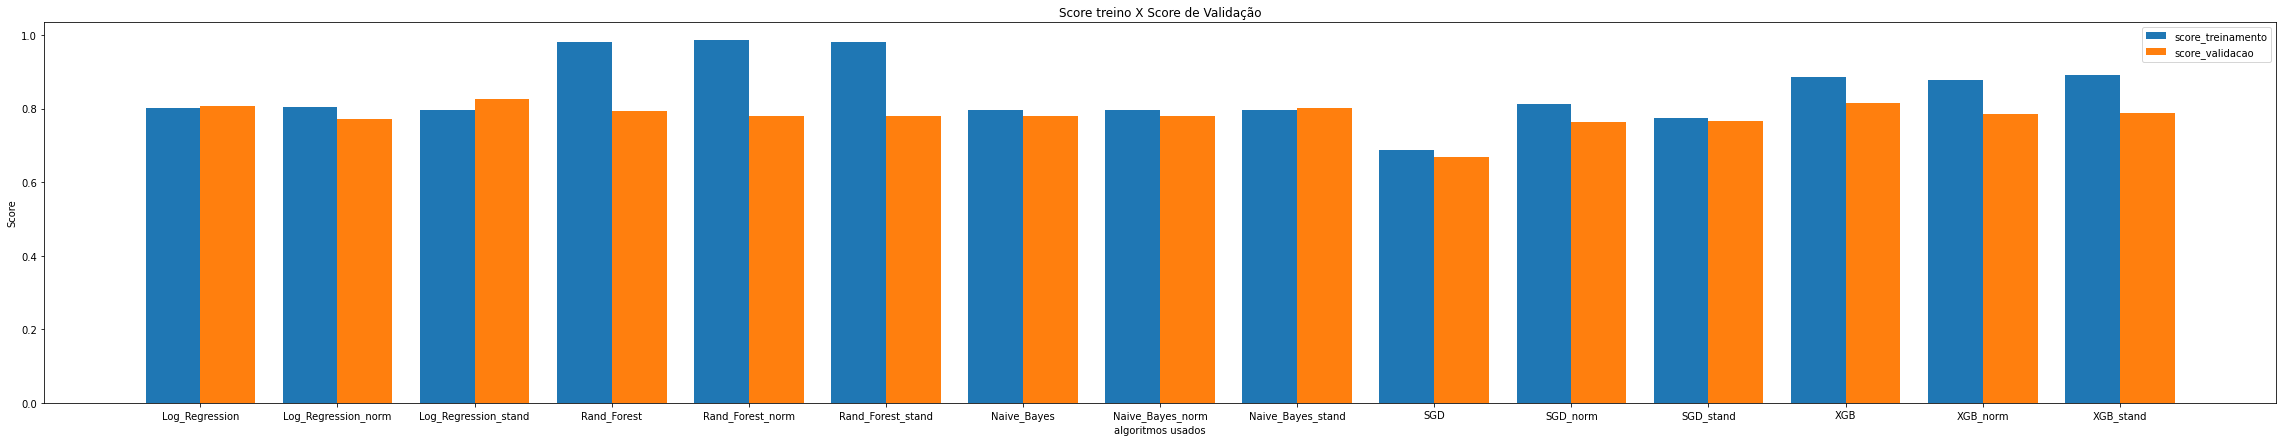

In [47]:
# Importing the matplotlib library
#import numpy as np
#import matplotlib.pyplot as plt


# Declaring the figure or the plot (y, x) or (width, height)

plt.figure(figsize=[40, 7])

w = 0.4
# Data to be plotted
x = resultados['algoritmo']
score_treinamento = resultados['score_treinamento']
score_validacao = resultados['score_validacao']

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, score_treinamento, w, label='score_treinamento')
plt.bar(bar2, score_validacao, w, label='score_validacao')

plt.xlabel('algoritmos usados')
plt.ylabel('Score')
plt.xticks(bar1+w/2,x)
plt.title('Score treino X Score de Validação')
plt.legend()
plt.show()

### Cross Validation

In [61]:
#Validação Cruzada

# Regressão Logística
reg_log_score = cross_val_score(reg_log, X, y, cv=10, scoring='accuracy')
reg_log_norm_score = cross_val_score(reg_log_norm, X_norm, y, cv=10, scoring='accuracy')
reg_log_stand_score = cross_val_score(reg_log_stand, X_stand, y, cv=10, scoring='accuracy')

# Random Forest
rand_for_score = cross_val_score(rand_for, X, y, cv=10, scoring='accuracy')
rand_for_norm_score = cross_val_score(rand_for_norm, X_norm, y, cv=10, scoring='accuracy')
rand_for_stand_score = cross_val_score(rand_for_stand, X_stand, y, cv=10, scoring='accuracy')

# Naives Bayes
nai_bayes_score = cross_val_score(nai_bayes, X, y, cv=10, scoring='accuracy')
nai_bayes_norm_score = cross_val_score(nai_bayes_norm, X_norm, y, cv=10, scoring='accuracy')
nai_bayes_stand_score = cross_val_score(nai_bayes_stand, X_stand, y, cv=10, scoring='accuracy')

# SGD
sgd_score = cross_val_score(sgd, X, y, cv=10, scoring='accuracy')
sgd_norm_score = cross_val_score(sgd_norm, X_norm, y, cv=10, scoring='accuracy')
sgd_stand_score = cross_val_score(sgd_stand, X_stand, y, cv=10, scoring='accuracy')

# XGB
xgb_score = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
xgb_norm_score = cross_val_score(xgb_norm, X_norm, y, cv=10, scoring='accuracy')
xgb_stand_score = cross_val_score(xgb_stand, X_stand, y, cv=10, scoring='accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


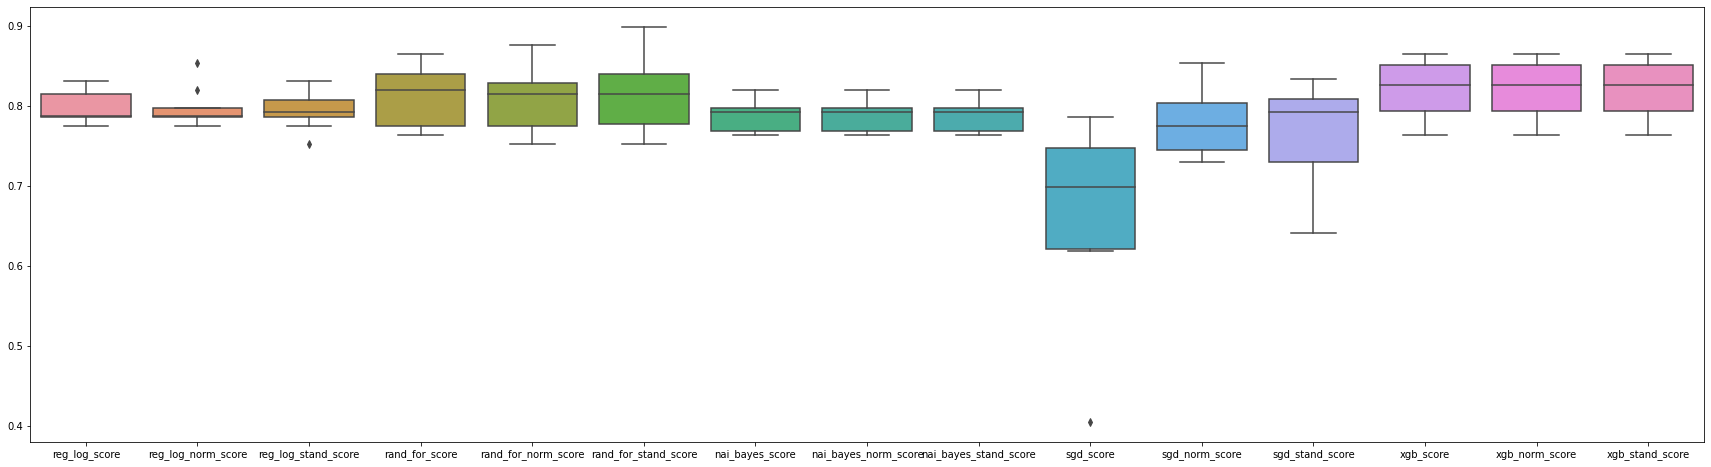

In [62]:
# Converter no DataFrame

resul_cross = pd.DataFrame({'reg_log_score':reg_log_score
                           ,'reg_log_norm_score':reg_log_norm_score
                           ,'reg_log_stand_score': reg_log_stand_score
                            
                           ,'rand_for_score': rand_for_score
                           ,'rand_for_norm_score': rand_for_norm_score
                           ,'rand_for_stand_score': rand_for_stand_score
                            
                           ,'nai_bayes_score': nai_bayes_score
                           ,'nai_bayes_norm_score': nai_bayes_norm_score
                           ,'nai_bayes_stand_score': nai_bayes_stand_score
                            
                           ,'sgd_score': sgd_score
                           ,'sgd_norm_score': sgd_norm_score
                           ,'sgd_stand_score': sgd_stand_score
                            
                           ,'xgb_score': xgb_score
                           ,'xgb_norm_score': xgb_norm_score
                           ,'xgb_stand_score': xgb_stand_score}
                           ,columns = ['reg_log_score','reg_log_norm_score','reg_log_stand_score'
                                      ,'rand_for_score','rand_for_norm_score','rand_for_stand_score'
                                      ,'nai_bayes_score','nai_bayes_norm_score','nai_bayes_stand_score'
                                      ,'sgd_score','sgd_norm_score','sgd_stand_score'
                                      ,'xgb_score','xgb_norm_score','xgb_stand_score'])

# Plotando os resultados

plt.figure(figsize=[30, 8])
sns.boxplot(data = resul_cross)


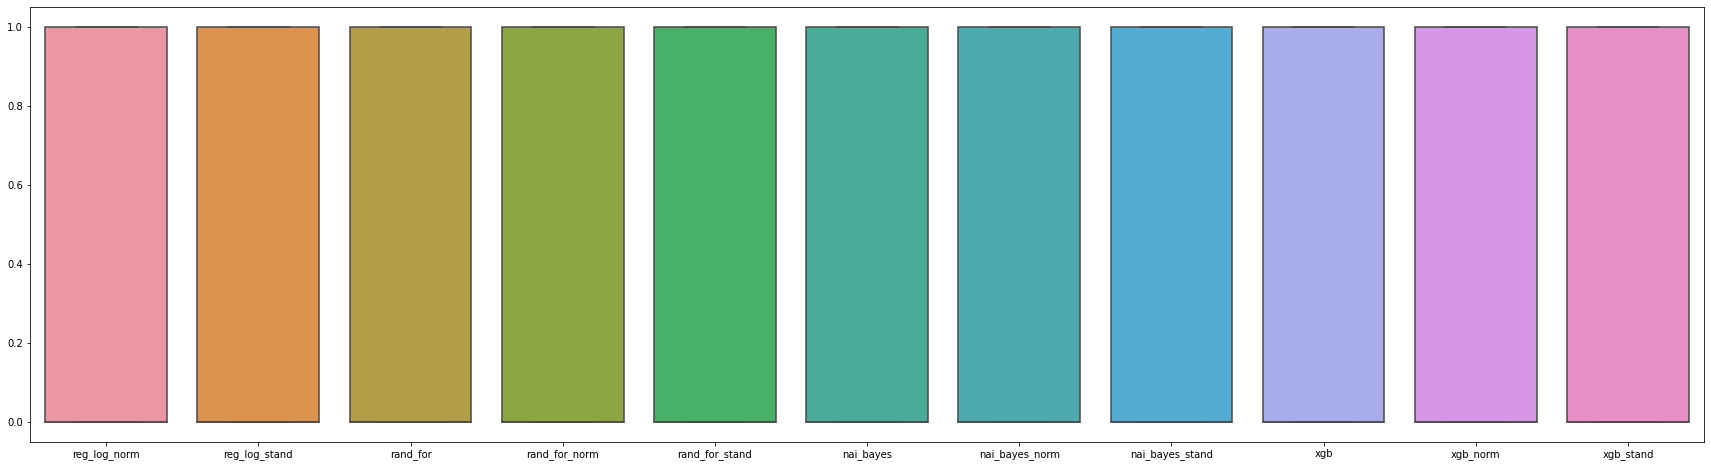

In [63]:
#visão dos resultados

check_in = pd.DataFrame({'reg_log_norm':reg_log_norm.predict(X_test_normal)
                        ,'reg_log_stand':reg_log_stand.predict(X_test_standard)

                        ,'rand_for':rand_for.predict(X_test)
                        ,'rand_for_norm':rand_for_norm.predict(X_test_normal)
                        ,'rand_for_stand':rand_for_stand.predict(X_test_standard)

                        ,'nai_bayes':nai_bayes.predict(X_test)
                        ,'nai_bayes_norm':nai_bayes_norm.predict(X_test_normal)
                        ,'nai_bayes_stand':nai_bayes_stand.predict(X_test_standard)

                        ,'xgb':xgb.predict(X_test)
                        ,'xgb_norm':xgb_norm.predict(X_test_normal)
                        ,'xgb_stand':xgb_stand.predict(X_test_standard)}
                        ,columns = ['reg_log_norm','reg_log_stand'
                                    ,'rand_for','rand_for_norm','rand_for_stand'
                                    ,'nai_bayes','nai_bayes_norm','nai_bayes_stand'
                                    ,'xgb','xgb_norm','xgb_stand'
                        ])
# Plotando os resultados

plt.figure(figsize=[30, 8])
sns.boxplot(data = check_in)

In [64]:
print('Média dos valores')
print()
print(resul_cross.mean().sort_values(ascending=False))
print('-'*80)
print()
print('Desvio Padrão')
print()
print(resul_cross.std().sort_values(ascending=True))

Média dos valores

xgb_stand_score          0.821586
xgb_norm_score           0.821586
xgb_score                0.821586
rand_for_stand_score     0.813745
rand_for_score           0.812622
rand_for_norm_score      0.808140
reg_log_norm_score       0.796866
reg_log_score            0.796866
reg_log_stand_score      0.793483
nai_bayes_stand_score    0.786779
nai_bayes_norm_score     0.786779
nai_bayes_score          0.786779
sgd_norm_score           0.780050
sgd_stand_score          0.766479
sgd_score                0.670000
dtype: float64
--------------------------------------------------------------------------------

Desvio Padrão

nai_bayes_score          0.018770
nai_bayes_norm_score     0.018770
nai_bayes_stand_score    0.018770
reg_log_score            0.020016
reg_log_stand_score      0.021383
reg_log_norm_score       0.023853
xgb_score                0.036626
xgb_norm_score           0.036626
xgb_stand_score          0.036626
rand_for_score           0.037852
rand_for_norm_score

Comparando os score por melhor média e menor desvio o algoritmo que teve melhor desempenho foi: Random Forest com standarizaçã0.

## Feauter Selection

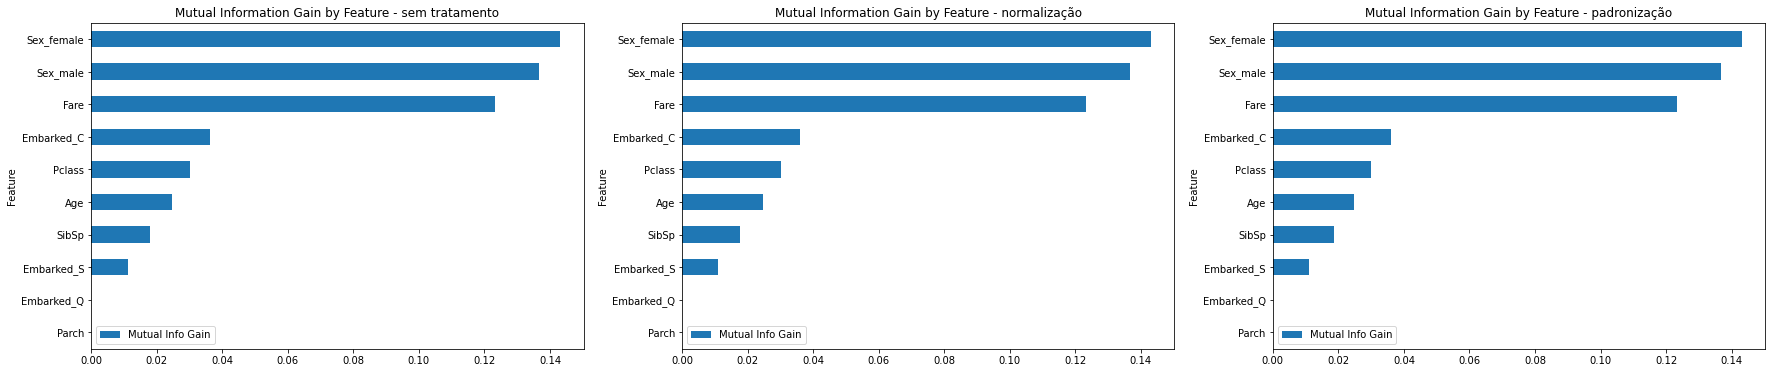

In [107]:
# Valor para reprodutibilidade
seed = 583
 
# Cálculo de ganho de informação por feature com relação a variável target
 
# Base sem normalização/padronização
info_score1 = mutual_info_classif(X, y, n_neighbors = 3, random_state = seed)
mutual_info1 = pd.DataFrame({'Feature': X.columns.values, 'Mutual Info Gain': info_score1})
 
# Base com normalização
info_score1 = mutual_info_classif(X_norm, y, n_neighbors = 3, random_state = seed)
mutual_info2 = pd.DataFrame({'Feature': X_norm.columns.values, 'Mutual Info Gain': info_score1})
 
# Base com padronização
info_score1 = mutual_info_classif(X_stand, y, n_neighbors = 3, random_state = seed)
mutual_info3 = pd.DataFrame({'Feature': X_stand.columns.values, 'Mutual Info Gain': info_score1})
 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [30,6])
mutual_info1.sort_values(by = 'Mutual Info Gain').plot.barh(x = 'Feature', y = 'Mutual Info Gain', ax = ax1, title = "Mutual Information Gain by Feature - sem tratamento")
 
mutual_info2.sort_values(by = 'Mutual Info Gain').plot.barh(x = 'Feature', y = 'Mutual Info Gain', ax = ax2, title = "Mutual Information Gain by Feature - normalização")
 
mutual_info3.sort_values(by = 'Mutual Info Gain').plot.barh(x = 'Feature', y = 'Mutual Info Gain', ax = ax3, title = "Mutual Information Gain by Feature - padronização")
 
plt.show()

## Submission

In [97]:
df_submission_0.iloc[:,1] = xgb.predict(X_test)

In [98]:
df_submission_0.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


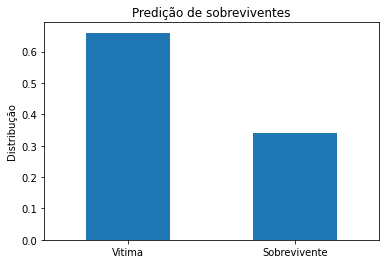

In [99]:
df_submission_0.iloc[:,1].value_counts(normalize = True).plot.bar(rot = 0, title = 'Predição de sobreviventes')
plt.ylabel('Distribução')
plt.xticks(np.arange(2), ['Vitima', 'Sobrevivente'])
plt.show()

In [100]:
xgb.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [102]:
df_submission_0.to_csv('df_submission_0.csv', index=False)
!cp df_submission_0.csv "drive/My Drive/"

In [103]:
df_submission_0

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
